In [11]:
import pandas as pd
from typing import List
import glob
import pathlib
import re
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from results import METHOD_NAME, ABLATIONS, BASELINES, scrape_latex

plt.rcParams["font.family"] = "Times New Roman"

from IPython.core.debugger import set_trace

%matplotlib inline
%load_ext autoreload
%autoreload 2

#matplotlib.use('TkAgg')

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

USER = "kimathikaai"
FILE_SAVE = f'/Users/{USER}/scratch/saved/domainbed_results'

# get latex files
latex_files = []
old_latex_files = []
folders = ["33_*", "66_*", '66', '33']
for folder in tqdm(folders):
    latex_files.extend(glob.glob(f'/Users/{USER}/scratch/saved/domainbed_results/rerun/{folder}/**/*.tex', recursive=True))
    old_latex_files.extend(glob.glob(f'/Users/{USER}/scratch/saved/domainbed_results/{folder}/**/*.tex', recursive=True))

    
print("Number of latex files: ", len(latex_files))
# convert latex documents to a pandas dataframe
data = []
# scrape each latex file
for file in latex_files:
    #print('[info] processing: ', file)
    data.extend(scrape_latex(file))

# convert to pandas data frame
df = pd.DataFrame.from_dict(data).sort_values(by=["baseline", "algorithm"], ascending=False).reset_index(drop=True)

# OLD *************************************************************************
print("Number of old latex files: ", len(old_latex_files))
# convert latex documents to a pandas dataframe
data = []
# scrape each latex file
for file in old_latex_files:
    #print('[info] processing: ', file)
    data.extend(scrape_latex(file))

# convert to pandas data frame
df_old = pd.DataFrame.from_dict(data).sort_values(by=["baseline", "algorithm"], ascending=False).reset_index(drop=True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.33it/s]


Number of latex files:  296
Number of old latex files:  161


In [2]:
#
# Identify duplicates
#
df.loc[df.duplicated()]
#df.loc[df_old.duplicated()]

,dataset,overlap,algorithm,selection_metric,evaluation_metric,selection_value,evaluation_value,selection_std,evaluation_std,baseline
14,OfficeHome,33,Transfer,nacc,accC61,None,31.8,None,2.2,1
15,OfficeHome,33,Transfer,nacc,accC58,None,23.4,None,2.7,1
16,OfficeHome,33,Transfer,nacc,accC49,None,39.8,None,1.1,1
17,OfficeHome,33,Transfer,nacc,accC64,None,53.2,None,2.8,1
18,OfficeHome,33,Transfer,nacc,accC48,None,46.7,None,2.3,1
...,...,...,...,...,...,...,...,...,...,...
2946,VLCS,66,FOND,nacc,accC3,None,25.2,None,4.5,0
2947,VLCS,66,FOND,nacc,macc,None,36.9,None,6.3,0
2948,VLCS,66,FOND,nacc,accC2,None,25.9,None,9.8,0
2949,VLCS,66,FOND,nacc,acc,None,39.7,None,4.9,0


In [8]:
df_old['algorithm'].unique()

array(['Transfer', 'SelfReg', 'PGrad', 'MLDG', 'ERM', 'EQRM', 'CausIRL',
       'CORAL', 'CAD', 'ARM', 'XMLDG', 'XDomMLDG', 'XDomError',
       'XDomBetaMLDGV2', 'XDomBetaMLDG', 'XDomBetaErrorMLDGV3',
       'XDomBetaErrorMLDGV2', 'XDomBetaErrorMLDG', 'XDomBatch',
       'Intra_XDom', 'Intra', 'FOND\\FBA', 'FOND\\FB', 'FOND\\F', 'FOND',
       'CausIRL_MMD'], dtype=object)

In [13]:
df.loc[df['algorithm'].isin(BASELINES + ABLATIONS)]['algorithm'].unique()

array(['Transfer', 'SelfReg', 'PGrad', 'MLDG', 'ERM', 'EQRM', 'CausIRL',
       'CORAL', 'CAD', 'ARM', 'FOND\\FBA', 'FOND\\FB', 'FOND\\F', 'FOND'],
      dtype=object)

## Validate results with domainbed_results
- These give different values than the previous runs, therefore for now we use the previous high (66) stats and these low stats (33) with the previous ones making up the difference

In [4]:
data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].isin(ABLATIONS+BASELINES)].sort_values(by='algorithm', ascending=True).reset_index(drop=True)
pd.pivot_table(data=data, values=['evaluation_value', 'evaluation_std'], index=['selection_metric', 'evaluation_metric','algorithm'], columns=['dataset', 'overlap'], aggfunc=np.mean)

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_38024/2864032026.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df.loc[(df['evaluation_metric'].isin(['nacc']))&(df['selection_metric'].isin(['nacc']))&(df['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df['overlap'].isin(['33', '66']))][df['algorithm'].isin(ABLATIONS+BASELINES)].sort_values(by='algorithm', ascending=True).reset_index(drop=True)


evaluation_std                 \
dataset                                          OfficeHome PACS      VLCS   
overlap                                                  33   33   66   33   
selection_metric evaluation_metric algorithm                                 
nacc             nacc              ARM                  0.1  1.3  2.9  0.9   
                                   CAD                  1.2  0.9  0.7  1.1   
                                   CORAL                0.2  0.8  1.0  1.4   
                                   ERM                  0.4  0.5  2.2  0.7   
                                   FOND                 0.3  1.4  1.1  0.5   
                                   FOND\F               0.3  0.3  0.7  1.3   
                                   FOND\FB              0.6  0.8  0.8  2.0   
                                   FOND\FBA             0.4  1.0  0.7  0.7   
                                   MLDG                 0.1  0.1  0.5  0.4   
                                   SelfReg              0.3  0.4  1.2  1.5   
                                   Transfer             0.3  1.8  1.6  0.6   

                                                       evaluation_value        \
dataset                                                      OfficeHome  PACS   
overlap                                             66               33    33   
selection_metric evaluation_metric algorithm                                    
nacc             nacc              ARM        1.400000             39.0  36.8   
                                   CAD        7.500000             36.9  33.0   
                                   CORAL      4.200000             40.7  33.3   
                                   ERM        3.300000             38.5  36.5   
                                   FOND       7.233333             40.5  36.7   
                                   FOND\F     7.100000             40.5  34.5   
                                   FOND\FB    4.200000             41.0  33.8   
                                   FOND\FBA   4.400000             41.2  34.4   
                                   MLDG       3.400000             38.1  38.0   
                                   SelfReg    0.200000             40.0  32.4   
                                   Transfer   3.000000             38.1  36.4   

                                                                     
dataset                                             VLCS             
overlap                                         66    33         66  
selection_metric evaluation_metric algorithm                         
nacc             nacc              ARM        16.2  47.7  49.000000  
                                   CAD        13.1  46.6  47.800000  
                                   CORAL      13.7  45.2  49.800000  
                                   ERM        14.5  47.6  51.800000  
                                   FOND       20.5  48.0  45.766667  
                                   FOND\F     16.0  46.4  52.100000  
                                   FOND\FB    16.1  50.0  45.100000  
                                   FOND\FBA   14.0  46.3  45.600000  
                                   MLDG       13.8  49.2  45.200000  
                                   SelfReg    13.4  45.4  41.900000  
                                   Transfer   16.0  48.3  48.900000

## Old Domainbed results

In [5]:
data = df_old.loc[(df_old['evaluation_metric'].isin(['nacc']))&(df_old['selection_metric'].isin(['nacc']))&(df_old['dataset'].isin(['PACS', 'OfficeHome', 'VLCS']))&(df_old['overlap'].isin(['33', '66']))&(df_old['algorithm'].isin(ABLATIONS+BASELINES))].sort_values(by='algorithm', ascending=True).reset_index(drop=True)
pd.pivot_table(data=data, values=['evaluation_value', 'evaluation_std'], index=['selection_metric', 'evaluation_metric','algorithm'], columns=['dataset', 'overlap'], aggfunc=np.mean)

evaluation_std                 \
dataset                                          OfficeHome      PACS        
overlap                                                  33   66   33   66   
selection_metric evaluation_metric algorithm                                 
nacc             nacc              ARM                  0.1  0.2  1.3  2.9   
                                   CAD                  1.2  1.4  0.9  0.7   
                                   CORAL                0.2  0.2  0.8  1.0   
                                   CausIRL              0.2  0.2  0.9  1.5   
                                   EQRM                 0.2  0.1  0.7  2.0   
                                   ERM                  0.4  0.6  0.5  2.2   
                                   FOND                 0.3  0.4  1.2  0.6   
                                   FOND\F               0.6  0.6  0.5  1.4   
                                   FOND\FB              0.5  0.7  0.5  0.6   
                                   FOND\FBA             0.4  0.5  1.2  1.3   
                                   MLDG                 0.1  0.7  0.1  0.5   
                                   PGrad                0.3  0.8  0.5  1.4   
                                   SelfReg              0.3  0.6  0.4  1.2   
                                   Transfer             0.3  0.2  1.8  1.6   

                                                       evaluation_value        \
dataset                                      VLCS            OfficeHome         
overlap                                        33   66               33    66   
selection_metric evaluation_metric algorithm                                    
nacc             nacc              ARM        0.9  1.4             39.0  38.4   
                                   CAD        1.5  5.8             36.9  36.4   
                                   CORAL      1.6  4.2             40.7  38.9   
                                   CausIRL    0.9  2.5             40.9  39.2   
                                   EQRM       1.1  3.5             39.9  37.8   
                                   ERM        1.0  3.3             38.5  37.5   
                                   FOND       0.4  3.5             40.3  40.6   
                                   FOND\F     1.0  6.0             40.6  40.8   
                                   FOND\FB    0.2  2.3             41.0  41.7   
                                   FOND\FBA   1.0  2.8             41.0  39.1   
                                   MLDG       2.0  3.4             38.1  37.4   
                                   PGrad      0.7  1.8             39.0  39.0   
                                   SelfReg    1.2  0.2             40.0  39.5   
                                   Transfer   0.6  3.0             38.1  36.8   

                                                                      
dataset                                       PACS        VLCS        
overlap                                         33    66    33    66  
selection_metric evaluation_metric algorithm                          
nacc             nacc              ARM        36.8  16.2  47.7  49.0  
                                   CAD        33.0  13.1  45.5  51.7  
                                   CORAL      33.3  13.7  45.5  49.8  
                                   CausIRL    33.6  13.3  45.8  48.9  
                                   EQRM       37.4  17.9  49.1  45.4  
                                   ERM        36.5  14.7  50.7  51.8  
                                   FOND       35.3  19.1  48.0  72.1  
                                   FOND\F     35.3  17.5  48.5  51.7  
                                   FOND\FB    33.2  15.4  50.0  44.0  
                                   FOND\FBA   35.4  17.3  46.6  51.3  
                                   MLDG       38.0  13.8  50.8  45.2  
                                   PGrad      34.4  12.6  49.0  40.2  
                                   SelfReg   

## Per-Class Accuracy 33-66

/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_38024/3127640191.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'High'], fontsize=20)
/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_38024/3127640191.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'High'], fontsize=20)
/var/folders/kr/gtghwjcs55q1lrp82b0qv62h0000gn/T/ipykernel_38024/3127640191.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'High'], fontsize=20)


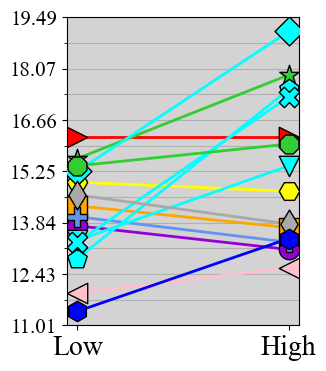

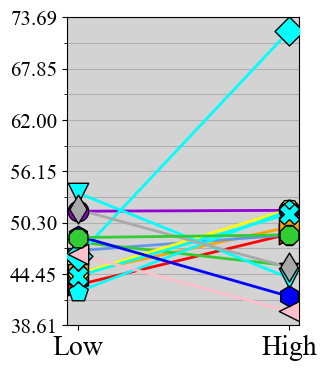

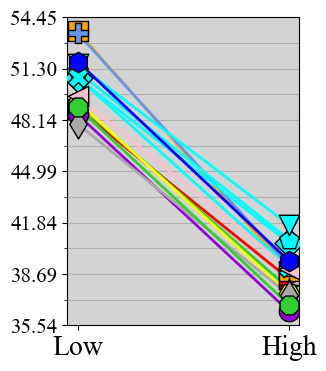

In [43]:
import numpy as np
from matplotlib.ticker import AutoMinorLocator, LinearLocator, MaxNLocator, FormatStrFormatter
import itertools
from results import ABLATIONS, ABLATION_MARKERS, BASELINE_MARKERS, BASE_COLORS, AXIS_LABELS, BASELINES

def plot_results(df, df_old, selec_metric, eval_metric, dataset):
    fig, ax = plt.subplots(figsize=(3,4))
    
    data = df.loc[
        (df['dataset'] == dataset) &
        (df['overlap'] == '33') &
        (df['selection_metric'] == selec_metric) &
        (df['evaluation_metric'].isin(eval_metric))&
        (df['algorithm'].isin(ABLATIONS+BASELINES))
    ].sort_values(by=['algorithm'], ascending=False)
    data_old = df_old.loc[
        (df_old['dataset'] == dataset) &
        (df_old['overlap'] == '66') &
        (df_old['selection_metric'] == selec_metric) &
        (df_old['evaluation_metric'].isin(["nacc"])) &
        (df_old['algorithm'].isin(ABLATIONS+BASELINES))
    ].sort_values(by=['algorithm'], ascending=False)
    
    data = pd.concat([data,data_old], ignore_index=True)
    # set_trace()

    # split data by class-shared setting
    data = data.groupby(["algorithm", 'overlap']).mean(numeric_only=True)
    data_value = data['evaluation_value'].unstack().reset_index(names="algorithm")
    
    i_p = 0
    i_b = 0
    for i, row in data_value.iterrows():
        if row["algorithm"] in ABLATIONS:
            color = "cyan"
            color_l = "black"
            marker = ABLATION_MARKERS[i_p]
            i_p += 1
        else:
            color = BASE_COLORS[i_b]
            color_l = color
            marker = BASELINE_MARKERS[i_b]
            i_b += 1
            
        ax.plot(['33', '66'], [row['33'], row['66']], label='_nolegend_', color=color, zorder=10, linewidth=2)
        ax.scatter(['33', '66'], [row['33'], row['66']], label=row['algorithm'], 
                   color=color, marker=marker, edgecolor="black", zorder=15, 
                   s=mpl.rcParams['lines.markersize']**3)


    # LABELS    
    #ax.set_title(dataset)
    #ax.set_ylabel(f"Class {[int(sub[4:]) for sub in eval_metric]} Accuracy", fontsize=12)
    #ax.set_xlabel('Shared-Class Distribution Setting', fontsize=12)
    
    #ax.legend(loc="center left", bbox_to_anchor=(1,0.5))
    
    # GRID
    ax.grid(axis="y", which="both")

    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    #ax.xaxis.set_minor_locator(AutoMinorLocator(2))


    #ax.get_yaxis().set_major_locator(MaxNLocator(integer=True, nbins=6, min_n_ticks=6))
    #ax.get_xaxis().set_major_locator(MaxNLocator(integer=True, nbins=7, min_n_ticks=7))

    ax.get_yaxis().set_major_locator(LinearLocator(numticks=7))
    #ax.get_xaxis().set_major_locator(LinearLocator(numticks=6))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    ax.set_facecolor('lightgray')
    #ax.set_xticks([0.25, 0.75], ['Low', 'High'])
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xticklabels(['Low', 'High'], fontsize=20)
    

    
    return fig, ax

# Remove irrelevant classes


# PACS
fig, ax = plot_results(df=df, df_old=df_old, selec_metric="nacc", eval_metric=["accC1", "accC6"], dataset="PACS")
fig.savefig(os.path.join(FILE_SAVE, 'track_pacs_plot.pdf'), bbox_inches='tight', format='pdf')

# VLCS
fig, ax = plot_results(df=df, df_old=df_old, selec_metric="nacc", eval_metric=["accC1"], dataset="VLCS")
fig.savefig(os.path.join(FILE_SAVE, 'track_vlcs_plot.pdf'), bbox_inches='tight', format='pdf')

# OfficeHome
fig, ax = plot_results(df=df, df_old=df_old, selec_metric="nacc", 
    eval_metric=["accC"+str(i) for i in list(range(5,38)) + list(range(27,44))], 
    dataset="OfficeHome")
fig.savefig(os.path.join(FILE_SAVE, 'track_officehome_plot.pdf'), bbox_inches='tight', format='pdf')

## Legend

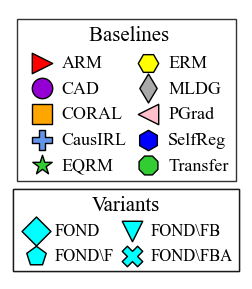

In [42]:
fig_leg = plt.figure(figsize=(3, 3.5))
ax_leg = fig_leg.add_subplot(111)
ax_leg.axis('off')

handles, labels = ax.get_legend_handles_labels()
# get baselines
baselines = ([], [])
ablations = ([], [])
for handle, label in zip(handles, labels):
    if label in BASELINES:
        baselines[0].append(handle)
        baselines[1].append(label)
    else:
        ablations[0].append(handle)
        ablations[1].append(label)

baseline_legend = ax_leg.legend(
    title="    Baselines   ",
    handles=baselines[0], 
    labels=baselines[1], 
    markerscale=1,
    #markerscale=5,
    #loc='lower center', 
    ncols=2,
    #ncols=len(baselines[0]),
#     ncols=len(baselines[0])//2,
#     bbox_to_anchor=(0.515, 0.88),
    loc='upper center', 
    #bbox_to_anchor=(0.9,0.43), 
    columnspacing=0.2,
    handletextpad=0.1,
    #labelspacing=0.4,
    fontsize=13,
    title_fontsize=15,
    fancybox=False,
    edgecolor='black',
    #bbox_to_anchor=(1,0.65),
    )


# Create the ablation class legend

# legend = fig.legend(
#     title="Ablations",
#     handles=ablations[0], 
#     labels=ablations[1], 
#     #ncols=8, 
#     loc='upper left', 
#     bbox_to_anchor=(1, 0.5), 
#     #fontsize=12, 
#     #columnspacing=0.2,
#     title_fontsize=15,
# )
variant_legend = ax_leg.legend(
    title="Variants",
    handles=ablations[0], 
    labels=ablations[1], 
    markerscale=1,
    #ncols=len(ablations[0])//2, 
#     loc='center left', 
#     bbox_to_anchor=(0.9,0.5),
    loc='lower center',
    #ncols=len(ablations[0]),
    #bbox_to_anchor=(0.9, 0.43),
    ncols=2,
    fontsize=12, 
    columnspacing=0.1,
    handletextpad=0.1,
    #labelspacing=0.4,
    title_fontsize=15,
    fancybox=False,
    edgecolor='black',
)

# Add the legend manually to the current Axes.
ax_leg.add_artist(baseline_legend)
ax_leg.add_artist(variant_legend)

#fig_leg.subplots_adjust(bottom=0.5, top=0.8)

# Save figure
fig_leg.savefig(os.path.join(FILE_SAVE, 'track_plot_legend.pdf'), bbox_inches='tight', format='pdf')